In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


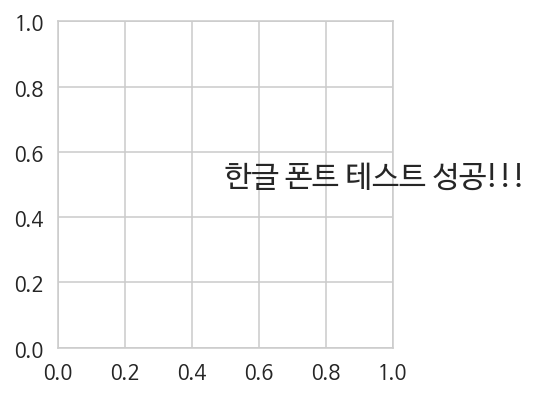

In [3]:
# 그래프 한글폰트 사용설정 in Colab

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [137]:
tour = pd.read_csv('/content/drive/MyDrive/2021 문화관광/DataSet/tour.csv')

In [138]:
tour.columns

Index(['Unnamed: 0', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7',
       'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A5_15',
       'A5_16', 'A5_17', 'A5_18', 'A5_19', 'A5_20', 'A5_21', 'sum'],
      dtype='object')

In [139]:
tour.rename(columns = {'Unnamed: 0':'지역'}, inplace=True)
print(tour.columns)

Index(['지역', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8',
       'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A5_15', 'A5_16',
       'A5_17', 'A5_18', 'A5_19', 'A5_20', 'A5_21', 'sum'],
      dtype='object')


In [140]:
tour.set_index('지역', inplace=True)

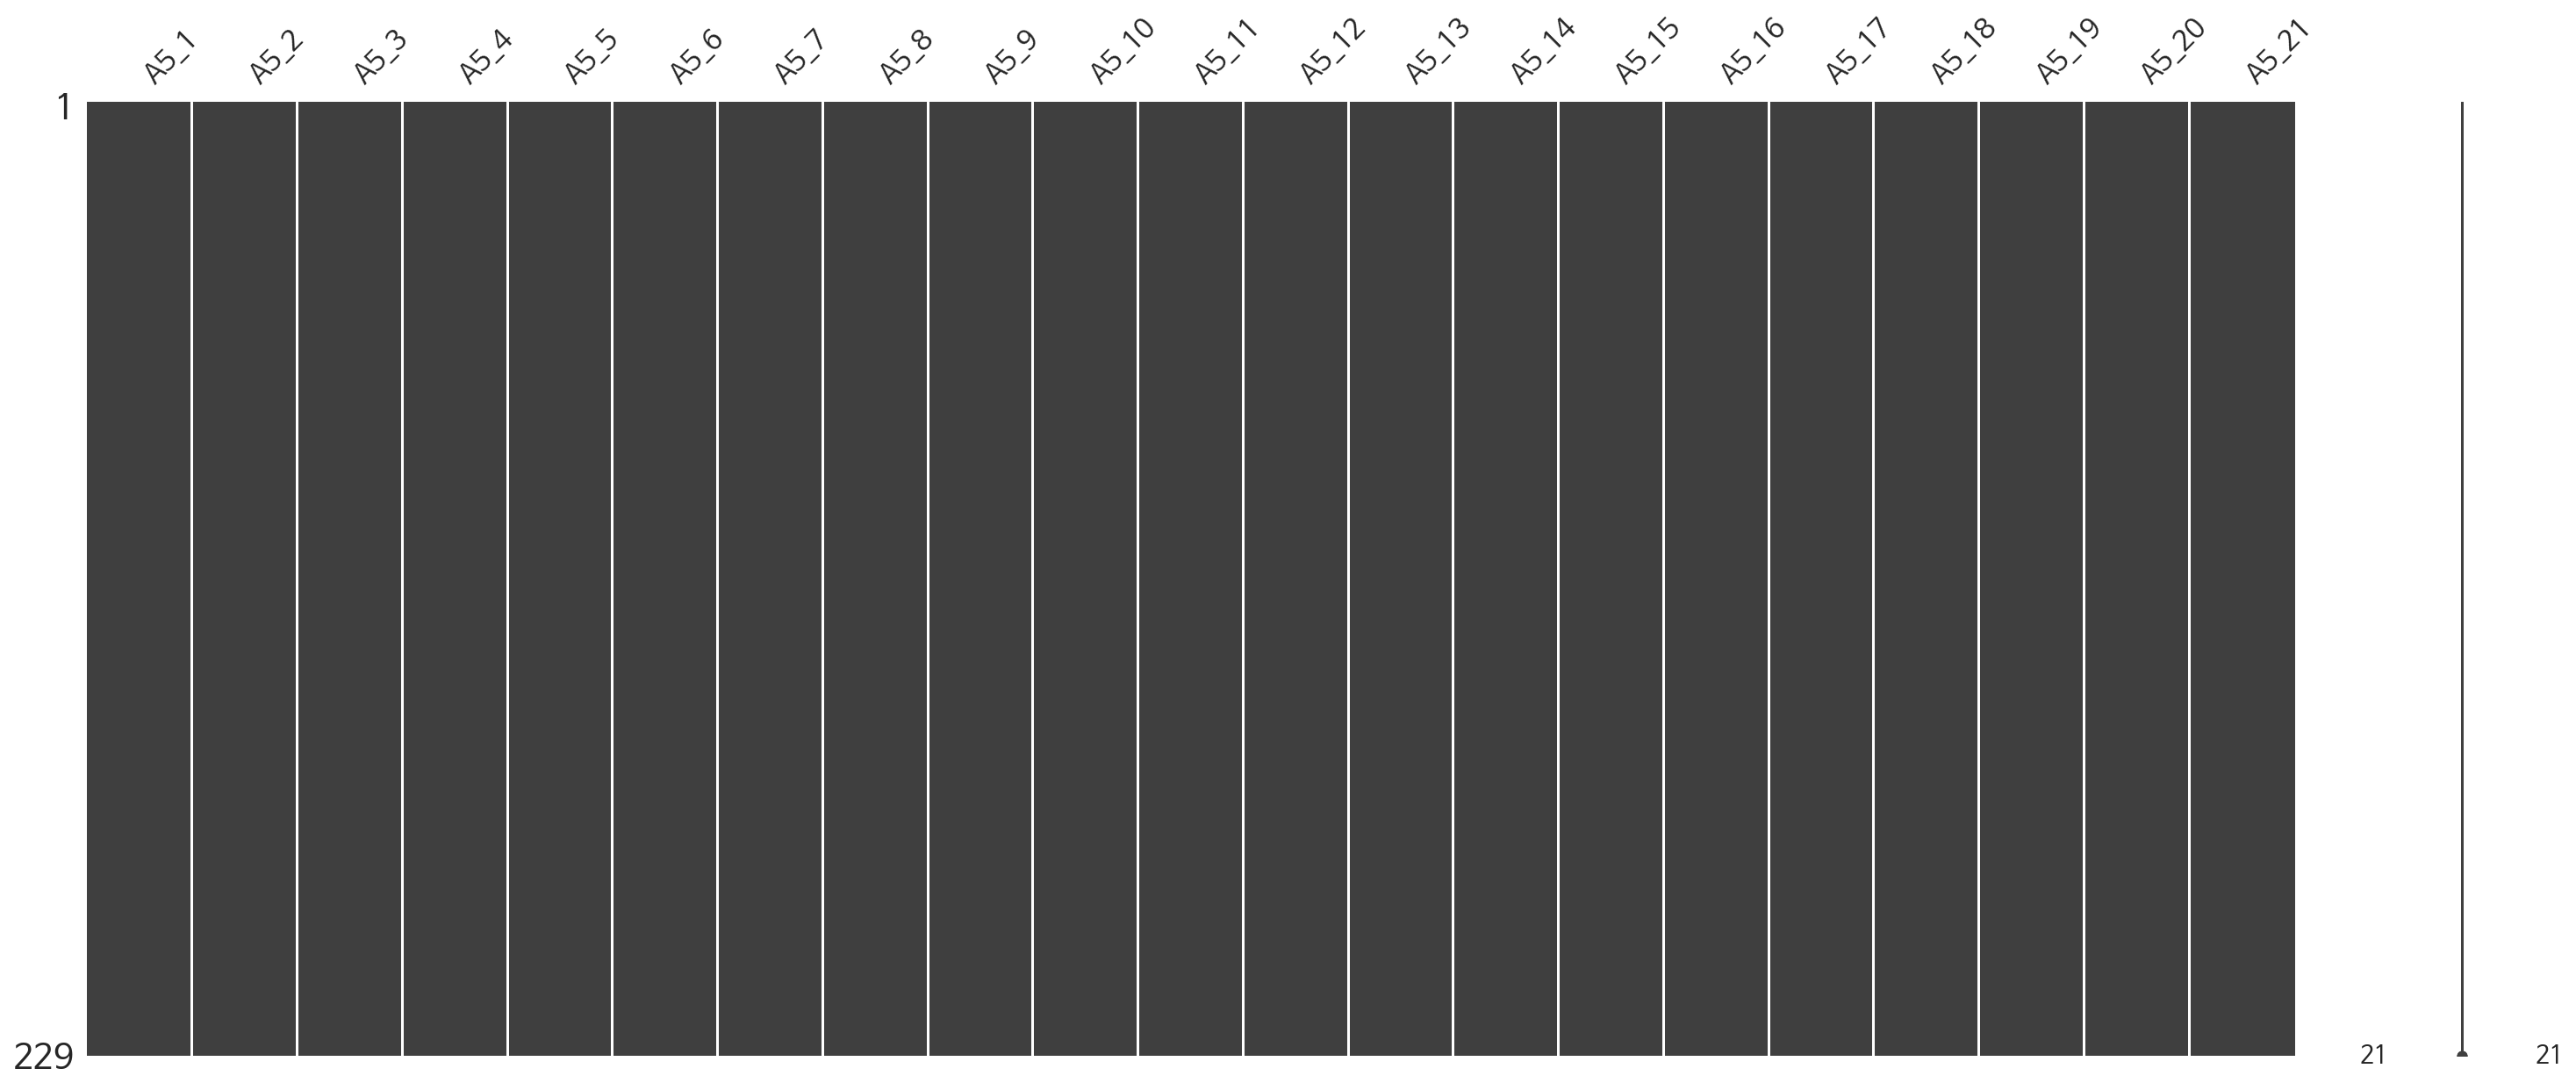

In [134]:
import missingno
missingno.matrix(tour)

In [141]:
tour

,A5_1,A5_2,A5_3,A5_4,A5_5,A5_6,A5_7,A5_8,A5_9,A5_10,A5_11,A5_12,A5_13,A5_14,A5_15,A5_16,A5_17,A5_18,A5_19,A5_20,A5_21,sum
지역,,,,,,,,,,,,,,,,,,,,,,
11010,0.063492,0.119048,0.005952,0.043651,0.007937,0.063492,0.000000,0.071429,0.015873,0.000000,0.003968,0.001984,0.000000,0.000000,0.039683,0.003968,0.005952,0.041667,0.005952,0.001984,0.003968,0.5
11020,0.066298,0.118785,0.002762,0.030387,0.016575,0.069061,0.002762,0.069061,0.016575,0.000000,0.002762,0.008287,0.002762,0.000000,0.046961,0.002762,0.000000,0.030387,0.005525,0.008287,0.000000,0.5
11030,0.090909,0.103306,0.000000,0.012397,0.008264,0.061983,0.000000,0.041322,0.012397,0.000000,0.004132,0.008264,0.000000,0.000000,0.037190,0.012397,0.020661,0.053719,0.012397,0.020661,0.000000,0.5
11040,0.147059,0.088235,0.000000,0.029412,0.029412,0.058824,0.000000,0.058824,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.5
11050,0.098214,0.098214,0.017857,0.000000,0.017857,0.089286,0.000000,0.017857,0.017857,0.000000,0.000000,0.008929,0.008929,0.000000,0.026786,0.000000,0.008929,0.089286,0.000000,0.000000,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38380,0.166667,0.086207,0.000000,0.022989,0.000000,0.155172,0.000000,0.000000,0.005747,0.000000,0.000000,0.000000,0.000000,0.000000,0.005747,0.000000,0.005747,0.045977,0.005747,0.000000,0.000000,0.5
38390,0.184524,0.071429,0.000000,0.000000,0.000000,0.148810,0.011905,0.011905,0.000000,0.000000,0.000000,0.000000,0.011905,0.000000,0.000000,0.005952,0.000000,0.047619,0.000000,0.000000,0.005952,0.5
38400,0.156028,0.063830,0.007092,0.017730,0.003546,0.134752,0.003546,0.000000,0.003546,0.000000,0.000000,0.000000,0.042553,0.000000,0.000000,0.003546,0.000000,0.049645,0.014184,0.000000,0.000000,0.5


In [122]:
tour.drop('sum', axis=1, inplace=True)

[1.4955558440995846]
[1.4955558440995846, 1.143438628883561]
[1.4955558440995846, 1.143438628883561, 0.9431839696643913]
[1.4955558440995846, 1.143438628883561, 0.9431839696643913, 0.8294460602688892]
[1.4955558440995846, 1.143438628883561, 0.9431839696643913, 0.8294460602688892, 0.7556262541770729]
[1.4955558440995846, 1.143438628883561, 0.9431839696643913, 0.8294460602688892, 0.7556262541770729, 0.7153916324690375]
[1.4955558440995846, 1.143438628883561, 0.9431839696643913, 0.8294460602688892, 0.7556262541770729, 0.7153916324690375, 0.6719247111710388]
[1.4955558440995846, 1.143438628883561, 0.9431839696643913, 0.8294460602688892, 0.7556262541770729, 0.7153916324690375, 0.6719247111710388, 0.6481529942480195]
[1.4955558440995846, 1.143438628883561, 0.9431839696643913, 0.8294460602688892, 0.7556262541770729, 0.7153916324690375, 0.6719247111710388, 0.6481529942480195, 0.6146031950177426]
[1.4955558440995846, 1.143438628883561, 0.9431839696643913, 0.8294460602688892, 0.7556262541770729,

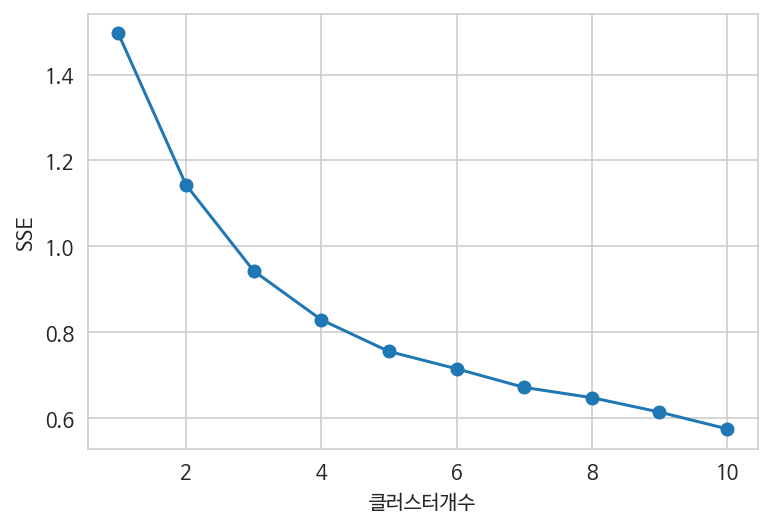

In [123]:
# 엘보우기법

def elbow(df):
  sse = []
  for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    print(sse)

  plt.plot(range(1,11), sse, marker='o')
  plt.xlabel('클러스터개수')
  plt.ylabel('SSE')
  plt.show()

elbow(tour)

In [114]:
kmeans = KMeans(n_clusters= 7, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(tour)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [115]:
print(kmeans.labels_)
print(kmeans.predict(tour))

[4 4 4 0 2 2 6 5 2 0 2 5 4 4 0 2 2 2 0 2 0 4 4 4 4 4 0 0 0 4 2 3 2 0 0 2 1
 2 1 2 0 4 0 3 2 4 2 2 2 1 3 2 0 0 4 5 0 1 1 4 4 2 2 2 0 4 0 4 0 3 2 3 0 3
 1 0 0 0 0 0 0 1 1 1 1 5 0 1 0 1 5 5 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 3 1 1 5
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 0 1 1 1 0 1 5 1 1 4 1 1 0 0 0 0 1 1 0 1 3 0
 1 1 0 0 2 0 0 3 5 1 1 1 0 3 3 1 1 1 0 3 0 1 1 1 0 0 0 1 0 0 1 0 2 1 1 1 0
 1 1 1 3 0 3 0 3 3 3 3 0 3 5 3 1 1 0 3 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 3 3 1
 3 3 3 3 3 0 0]
[4 4 4 0 2 2 6 5 2 0 2 5 4 4 0 2 2 2 0 2 0 4 4 4 4 4 0 0 0 4 2 3 2 0 0 2 1
 2 1 2 0 4 0 3 2 4 2 2 2 1 3 2 0 0 4 5 0 1 1 4 4 2 2 2 0 4 0 4 0 3 2 3 0 3
 1 0 0 0 0 0 0 1 1 1 1 5 0 1 0 1 5 5 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 3 1 1 5
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 0 1 1 1 0 1 5 1 1 4 1 1 0 0 0 0 1 1 0 1 3 0
 1 1 0 0 2 0 0 3 5 1 1 1 0 3 3 1 1 1 0 3 0 1 1 1 0 0 0 1 0 0 1 0 2 1 1 1 0
 1 1 1 3 0 3 0 3 3 3 3 0 3 5 3 1 1 0 3 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 3 3 1
 3 3 3 3 3 0 0]


In [109]:
tour['cluster'] = kmeans.labels_

###PCA - scree plot

In [84]:
pca = PCA(n_components=len(tour.columns)-1)
pca_fit = pca.fit(tour)

In [92]:
print('\n------------------- PCA Result Summary ------------- \n')
print('Singular value : \n', pca.singular_values_)
print('Singular vector : \n', pca.components_.T)
print('\n Explain Standard deviations : \n', np.sqrt(pca.explained_variance_))
print('\n Explain Variance Ratio : \n', pca.explained_variance_ratio_)
print('\n Noise Variance : \n', pca.noise_variance_)


------------------- PCA Result Summary ------------- 

Singular value : 
 [0.78879172 0.54923025 0.38393337 0.35384327 0.25372342 0.24246123
 0.19895877 0.1905919  0.1366289  0.13406858 0.11274175 0.1087564
 0.10008576 0.09516012 0.07766218 0.07387661 0.06451328 0.0594275
 0.02001353 0.01379918]
Singular vector : 
 [[-6.16471425e-01  4.70792485e-01  4.55638419e-01  6.64029956e-02
   2.81566734e-01  6.25018506e-03 -1.25328915e-01 -1.38029096e-01
  -5.14734762e-02 -2.86720111e-02  1.53236818e-02 -3.48571094e-02
  -1.17069832e-02 -9.66735586e-02 -5.79804308e-02 -2.45658980e-02
  -2.44820720e-02 -2.50164069e-02 -5.42189839e-02 -4.54974037e-02]
 [-1.74240891e-01 -4.43938218e-01 -7.14524636e-02  8.27532429e-01
   1.70955080e-02  1.46301165e-02 -6.95393941e-02  2.56544503e-03
  -5.11529001e-02 -8.10683305e-02 -4.57324995e-02 -8.77862288e-02
  -9.55022845e-03 -5.94188131e-02  8.41912098e-03  2.21738068e-02
  -2.29122896e-02 -4.37292630e-02 -4.88223427e-02 -4.10385355e-02]
 [-4.51281519e-02  9

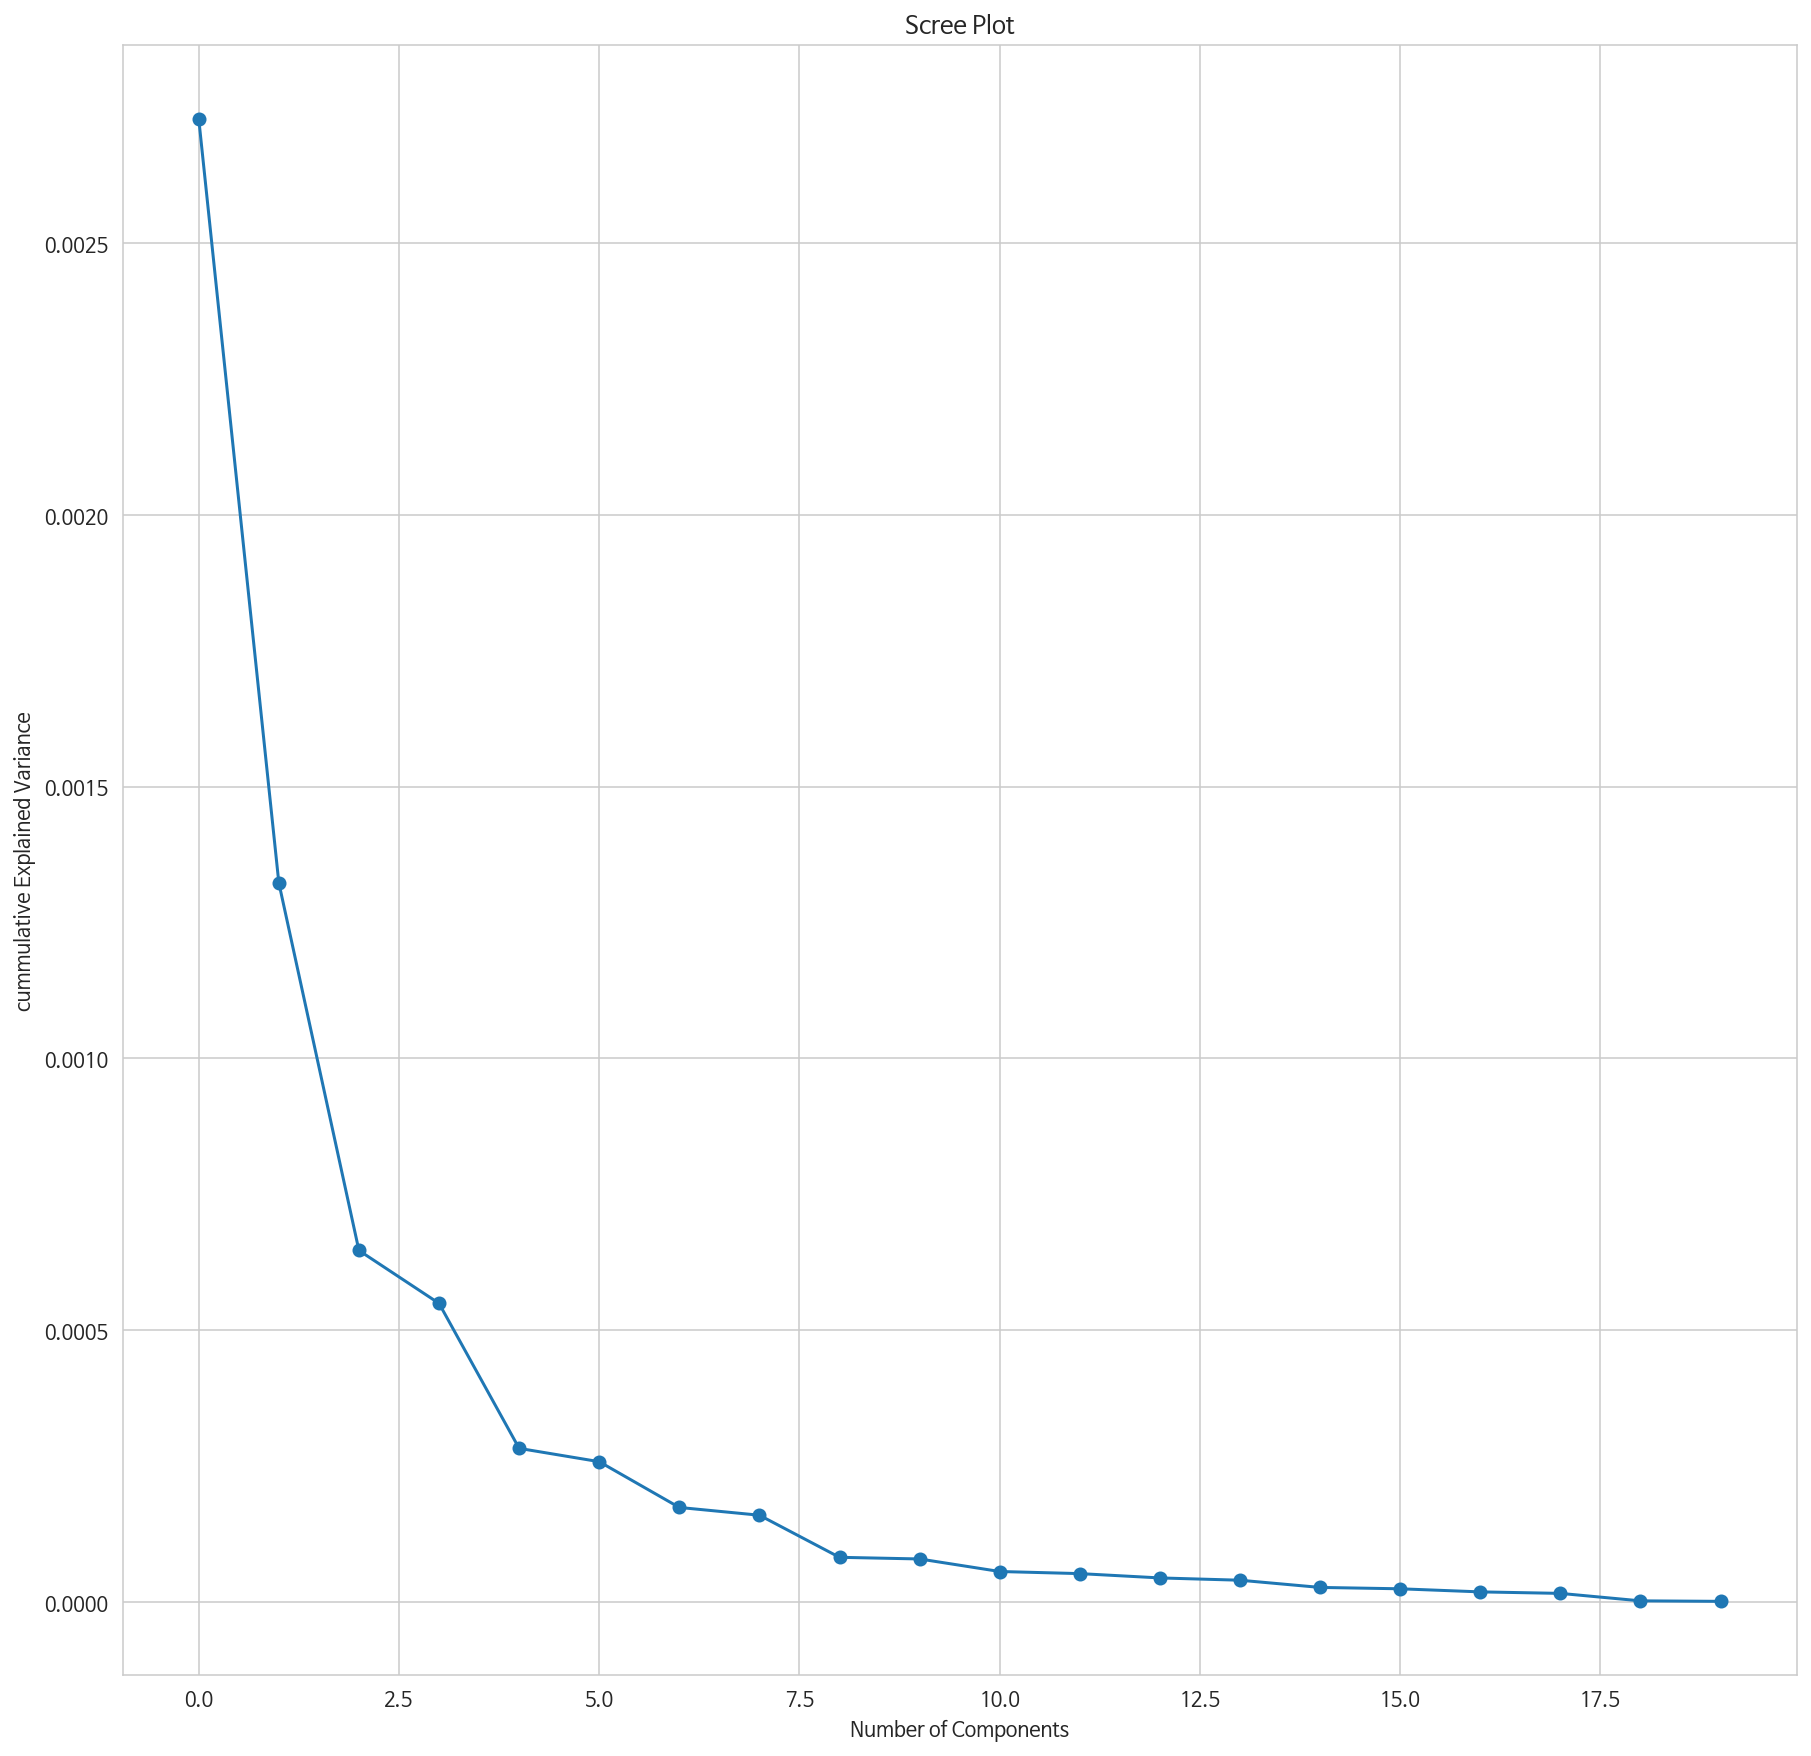

In [90]:
# Scree Plot
plt.figure(figsize=(15,15))
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('cummulative Explained Variance')
plt.plot(pca.explained_variance_, 'o-')

In [129]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(tour, 'single')

In [132]:
linked

array([[2.27000000e+02, 2.28000000e+02, 6.52472188e-03, 2.00000000e+00],
       [1.33000000e+02, 1.65000000e+02, 1.57454756e-02, 2.00000000e+00],
       [1.16000000e+02, 2.10000000e+02, 1.57820194e-02, 2.00000000e+00],
       [9.80000000e+01, 2.00000000e+02, 1.74302545e-02, 2.00000000e+00],
       [4.00000000e+01, 7.60000000e+01, 1.76046005e-02, 2.00000000e+00],
       [2.60000000e+01, 5.20000000e+01, 1.89356500e-02, 2.00000000e+00],
       [1.81000000e+02, 1.86000000e+02, 1.92142184e-02, 2.00000000e+00],
       [1.64000000e+02, 1.69000000e+02, 1.95214682e-02, 2.00000000e+00],
       [1.04000000e+02, 2.31000000e+02, 1.95845561e-02, 3.00000000e+00],
       [1.63000000e+02, 2.35000000e+02, 1.96419319e-02, 3.00000000e+00],
       [6.90000000e+01, 2.24000000e+02, 1.97960971e-02, 2.00000000e+00],
       [1.45000000e+02, 1.49000000e+02, 1.98082708e-02, 2.00000000e+00],
       [2.14000000e+02, 2.21000000e+02, 1.98594338e-02, 2.00000000e+00],
       [2.13000000e+02, 2.22000000e+02, 2.01012815e

In [131]:
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

IndexError: ignored

<Figure size 720x504 with 0 Axes>